In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report,r2_score

In [37]:
from sklearn.preprocessing import LabelEncoder

In [4]:
from sklearn.linear_model import LogisticRegression

In [10]:
f1 = r"C:\Users\alokk\Downloads\test_data.txt" 
df_test = pd.read_csv(f1,sep=":::",header=0,engine='python')


In [11]:
print(df_test.head(5))

   1           Edgar's Lunch (1998)   \
0   2      La guerra de papá (1977)    
1   3   Off the Beaten Track (2010)    
2   4        Meu Amigo Hindu (2015)    
3   5             Er nu zhai (1955)    
4   6            Riddle Room (2016)    

   L.R. Brane loves his life - his car, his apartment, his job, but especially his girlfriend, Vespa. One day while showering, Vespa runs out of shampoo. L.R. runs across the street to a convenience store to buy some more, a quick trip of no more than a few minutes. When he returns, Vespa is gone and every trace of her existence has been wiped out. L.R.'s life becomes a tortured existence as one strange event after another occurs to confirm in his mind that a conspiracy is working against his finding Vespa.  
0   Spain, March 1964: Quico is a very naughty ch...                                                                                                                                                                                                

In [12]:

import pandas as pd

f2 = r"C:\Users\alokk\Downloads\train_data.txt" 
df_train = pd.read_csv(f2, sep=":::",header=0,engine='python')

# Print the 3rd row (index starts from 0)
print(df_train.iloc[0:2])  # 2 is the index for the 3rd row
print(df_train.head(4))

   1        Oscar et la dame rose (2009)       drama   \
0   2                       Cupid (1997)    thriller    
1   3   Young, Wild and Wonderful (1980)       adult    

   Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.  
0   A brother and sister with a past incestuous r...                                                                                                                                                                                                                                 

In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                     

In [23]:
df_train.columns=['SN','movie_name','category','description']
df_test.columns=['SN','movie_name','description']

In [24]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [25]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           54199 non-null  int64 
 1   movie_name   54199 non-null  object
 2   description  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [26]:
df_train.shape

(54213, 4)

In [27]:
df_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   SN           54213 non-null  int64 
 1   movie_name   54213 non-null  object
 2   category     54213 non-null  object
 3   description  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [29]:
df_test.isnull().sum()

SN             0
movie_name     0
description    0
dtype: int64

In [30]:
df_train.count()

SN             54213
movie_name     54213
category       54213
description    54213
dtype: int64

In [31]:
df_train.head()

,SN,movie_name,category,description
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [32]:
df_test.head()

,SN,movie_name,description
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


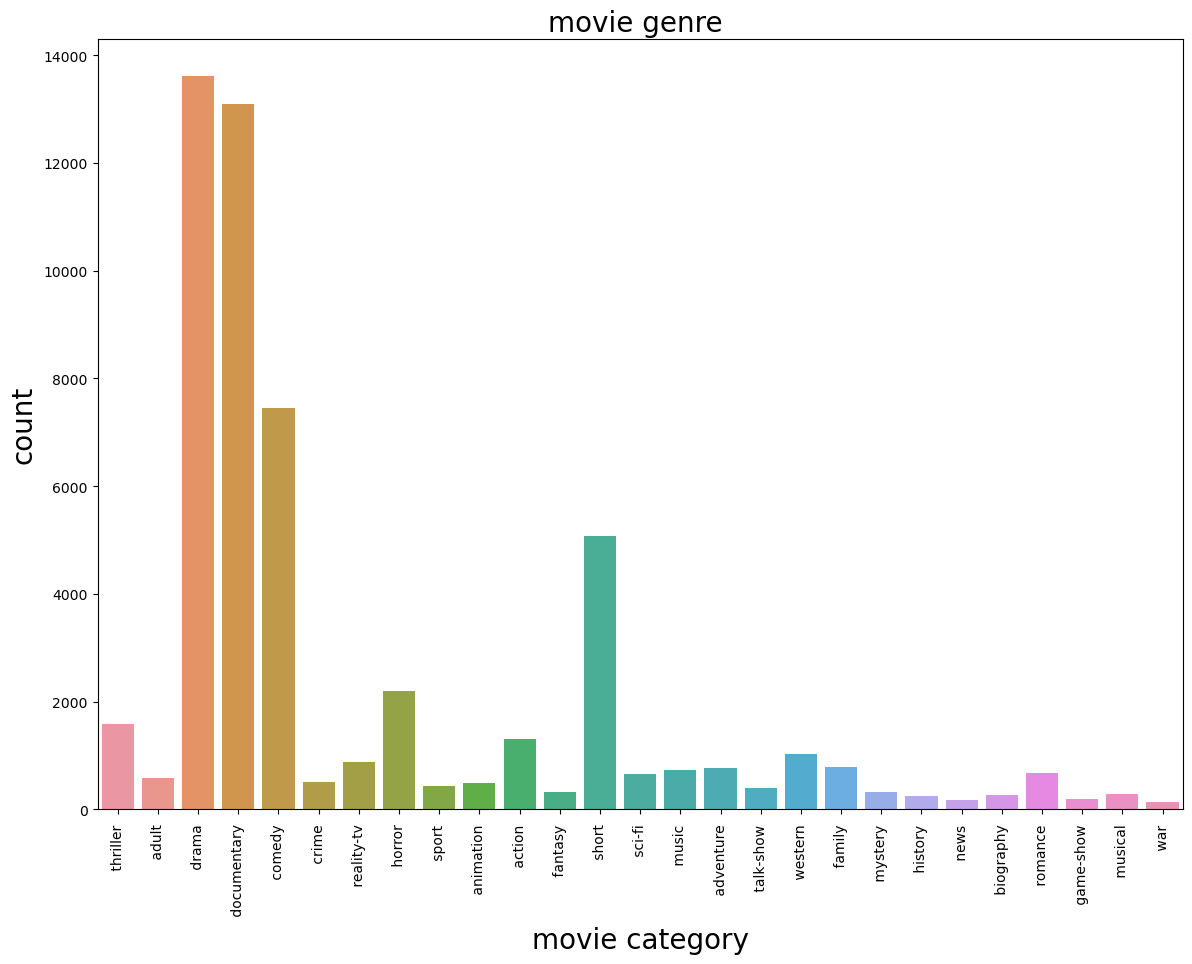

In [53]:
plt.figure(figsize=(14,10))
sns.countplot(x='category',data=df_train)
plt.xlabel('movie category',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('movie genre ',fontsize=20)
plt.xticks(rotation=90);
plt.show()

C:\Users\alokk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


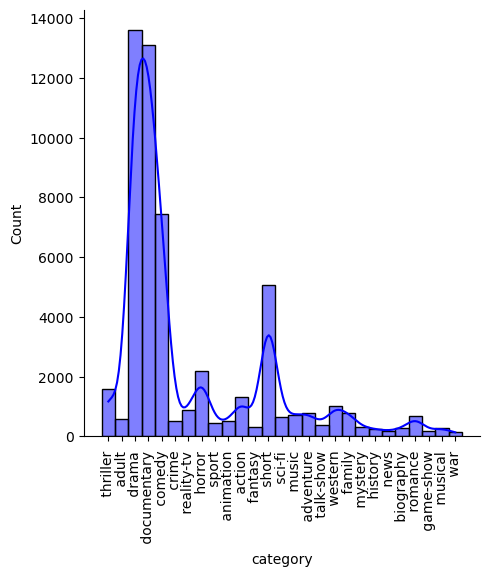

In [51]:
sns.displot(df_train.category,kde=True,color='blue')
plt.xticks(rotation=90);

C:\Users\alokk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


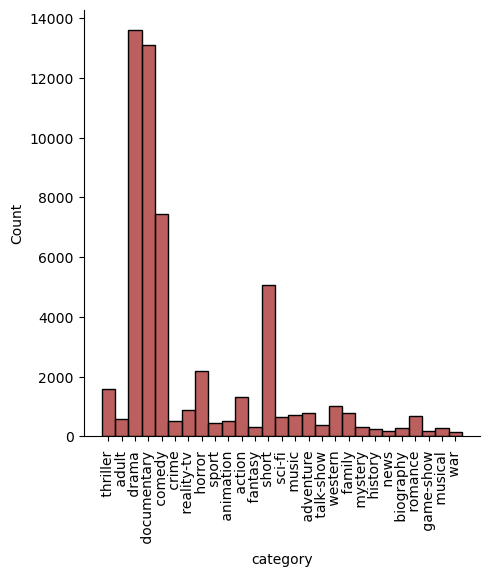

In [47]:
sns.displot(df_train.category,kde=False ,color='brown')
plt.xticks(rotation=90);

In [56]:
df_mix=pd.concat([df_test,df_train],axis=0)

In [57]:
df_mix.head()

,SN,movie_name,description,category
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
3,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,NaN


In [58]:
df_mix.shape

(108412, 4)

In [59]:
df_mix.size

433648

In [63]:
df_mix.isnull()

,SN,movie_name,description,category
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
...,...,...,...,...
54208,False,False,False,False
54209,False,False,False,False
54210,False,False,False,False
54211,False,False,False,False


In [64]:
df_mix.count()

SN             108412
movie_name     108412
description    108412
category        54213
dtype: int64

In [65]:
encoder=LabelEncoder()
df_mix["category"]=encoder.fit_transform(df_mix["category"].values)

In [66]:
encoder=LabelEncoder()
df_mix["movie_name"]=encoder.fit_transform(df_mix["movie_name"].values)

In [67]:
df_mix.head()

,SN,movie_name,description,category
0,2,55851,"Spain, March 1964: Quico is a very naughty ch...",27
1,3,68987,One year in the life of Albin and his family ...,27
2,4,63282,"His father has died, he hasn't spoken with hi...",27
3,5,38254,Before he was known internationally as a mart...,27
4,6,76502,Emily Burns is being held captive in a room w...,27


In [69]:
df_mix.category=df_mix.category.fillna(df_mix.category.mean())

In [70]:
df_mix.count()

SN             108412
movie_name     108412
description    108412
category       108412
dtype: int64

In [71]:
df_mix.duplicated().values

array([False, False, False, ..., False, False, False])

In [72]:
Vectorizer=TfidfVectorizer()

In [74]:
X=Vectorizer.fit_transform(df_mix['description'])

In [75]:
df_mix.head()

,SN,movie_name,description,category
0,2,55851,"Spain, March 1964: Quico is a very naughty ch...",27
1,3,68987,One year in the life of Albin and his family ...,27
2,4,63282,"His father has died, he hasn't spoken with hi...",27
3,5,38254,Before he was known internationally as a mart...,27
4,6,76502,Emily Burns is being held captive in a room w...,27


In [76]:
y=df_mix["category"]

In [77]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [78]:
naive_bayes_model=MultinomialNB()


In [79]:
naive_bayes_model.fit(X_train,y_train)

MultinomialNB()

In [80]:
nb_prediction=naive_bayes_model.predict(X_test)

In [83]:
print("naive bayes model")
print(confusion_matrix(y_test,nb_prediction))
print(classification_report(y_test,nb_prediction))
print("accuracy",accuracy_score(y_test,nb_prediction))
print("r2_score",r2_score(y_test,nb_prediction))

naive bayes model
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   260]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   112]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   166]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   102]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    55]
 [    0     0     0     0     0    21     0     0     5     0     0     0
      0     0     0     0     0  

C:\Users\alokk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alokk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\alokk\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
